<h1 align=center><font size = 5> Geological Layer of Nickel Deposit Classification</font></h1>

# Business Problems

A Mining company concerned about they human resource limitation like geologist to make a classification about the mineral content and the geological layer. then they hire a data scinetist to help the geologist predict and classify the geological layer. 

Lets first import required libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

# Data Story

We'll use Drilling data to predict and classify the geological layer. This data contains 8 columns and 837 rows. the dataset includes information about:
- Hole ID which represent the Drill Hole.
- Mineral content (such as nickel (Ni), iron (Fe), etc) in specific depth on each Hole ID.
- Depth information such as from and to in meters (m).
- geological layer in specific depth on each hole ID.

Load the csv data from our library

In [2]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_1072d4c063164370a50a918430413880 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='qEO3RHSqTWn4bQGl4OmAYPzSAUEwrcsxYDd3SZ3gtn87',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_1072d4c063164370a50a918430413880.get_object(Bucket='geologicallayerofnickeldepositcla-donotdelete-pr-tkdnw28uehqnha',Key='geoassay.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

#df_data_1 = pd.read_csv(body)
#df_data_1.head()

geoassay = pd.read_csv(body)
print(geoassay.shape)



(837, 8)


In [3]:
geoassay

,Hole ID,From,To,Ni,Fe,Sio2,Mgo,Layer
0,A001,0.0,1.00,0.62,48.05,2.87,0.51,LIM
1,A001,1.0,2.00,0.73,49.93,1.85,0.49,LIM
2,A001,2.0,3.00,0.77,47.70,2.25,0.63,LIM
3,A001,3.0,4.00,0.91,45.51,2.73,0.66,LIM
4,A001,4.0,5.00,1.09,42.00,3.30,0.60,LIM
...,...,...,...,...,...,...,...,...
832,A048,3.0,3.50,0.35,12.40,40.64,17.38,SAP
833,A048,3.5,4.00,0.23,7.62,36.36,23.00,BRK
834,A048,4.0,5.00,0.24,7.75,36.36,24.70,BRK
835,A048,5.0,6.00,0.22,8.01,38.50,24.79,BRK


# Data Pre-Processing

Let's check if there are missing values in the data set. and analyze the features we want to select and use in the modelling process.

In [4]:
geoassay.isnull().sum()

Hole ID    0
From       0
To         0
Ni         0
Fe         0
Sio2       0
Mgo        0
Layer      0
dtype: int64

In [5]:
geoassay.describe()

,From,To,Ni,Fe,Sio2,Mgo
count,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000
mean,8.802091,9.766308,1.092999,28.383799,19.396691,10.909869
std,6.104702,6.098092,0.687618,17.944113,16.454190,10.965512
min,0.000000,1.000000,0.160000,3.890000,1.000000,0.010000
25%,4.000000,5.000000,0.580000,9.340000,2.140000,0.130000
50%,8.000000,9.000000,0.930000,28.200000,21.390000,6.880000
75%,13.000000,14.000000,1.510000,47.110000,36.360000,22.170000
max,29.000000,30.000000,3.640000,52.420000,43.190000,35.710000


Let's we drop the 'From' feature since it was have same information with the 'To' feature. and we want to rename 'To' feature into 'Depth' feature.

In [6]:
geoassay.drop(columns='From',inplace=True)
geoassay.rename(columns={'To':'Depth'},inplace=True)
geoassay

,Hole ID,Depth,Ni,Fe,Sio2,Mgo,Layer
0,A001,1.00,0.62,48.05,2.87,0.51,LIM
1,A001,2.00,0.73,49.93,1.85,0.49,LIM
2,A001,3.00,0.77,47.70,2.25,0.63,LIM
3,A001,4.00,0.91,45.51,2.73,0.66,LIM
4,A001,5.00,1.09,42.00,3.30,0.60,LIM
...,...,...,...,...,...,...,...
832,A048,3.50,0.35,12.40,40.64,17.38,SAP
833,A048,4.00,0.23,7.62,36.36,23.00,BRK
834,A048,5.00,0.24,7.75,36.36,24.70,BRK
835,A048,6.00,0.22,8.01,38.50,24.79,BRK


We need to label all the categorical values using Label Encoder. So the values with convert automatically. as you can see below the hole ID A001 = 0 so on till Hole ID A048 = 47. and for Layer BRK = 0, LIM = 1, and SAP = 2 

In [7]:
L_Layer = LabelEncoder()
L_Hole = LabelEncoder()
geoassay['Layer_L'] = L_Layer.fit_transform(geoassay['Layer'])
geoassay['Hole ID'] = L_Hole.fit_transform(geoassay['Hole ID'])
geoassay

,Hole ID,Depth,Ni,Fe,Sio2,Mgo,Layer,Layer_L
0,0,1.00,0.62,48.05,2.87,0.51,LIM,1
1,0,2.00,0.73,49.93,1.85,0.49,LIM,1
2,0,3.00,0.77,47.70,2.25,0.63,LIM,1
3,0,4.00,0.91,45.51,2.73,0.66,LIM,1
4,0,5.00,1.09,42.00,3.30,0.60,LIM,1
...,...,...,...,...,...,...,...,...
832,47,3.50,0.35,12.40,40.64,17.38,SAP,2
833,47,4.00,0.23,7.62,36.36,23.00,BRK,0
834,47,5.00,0.24,7.75,36.36,24.70,BRK,0
835,47,6.00,0.22,8.01,38.50,24.79,BRK,0


In [8]:
geoassay.drop(columns='Layer',inplace=True)

Since the goal is to classify the geological layer, so we need some data visualization about the geological layer and other feature related.

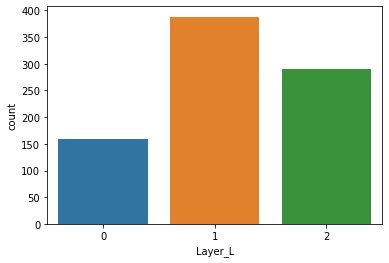

In [9]:
sns.countplot(data=geoassay,x='Layer_L')

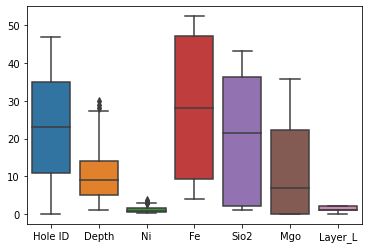

In [10]:
sns.boxplot(data=geoassay)

As you can see below, Nickel content is the most valuable content to classify the layer (which is good or not). and the figure show that Layer 0 (Bedrock) is the least value of Ni, and Layer 1 (Limonite) is had the range of Ni between 0.5 - 2.0, and Layer 2 (Saprolite) is had the biggest value of Ni. 

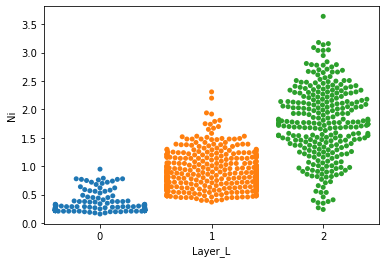

In [11]:
sns.swarmplot(data=geoassay,x='Layer_L',y='Ni')

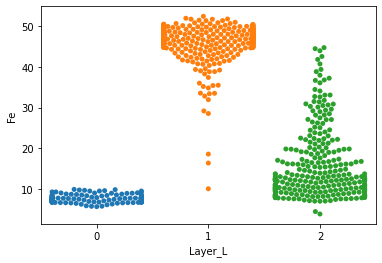

In [12]:
sns.swarmplot(data= geoassay,x='Layer_L',y='Fe')

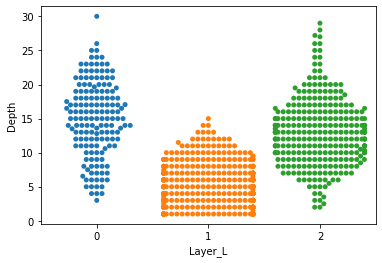

In [13]:
sns.swarmplot(data= geoassay,x='Layer_L',y='Depth')

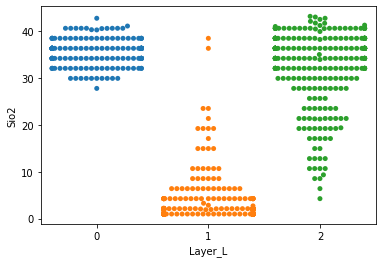

In [14]:
sns.swarmplot(data= geoassay,x='Layer_L',y='Sio2')

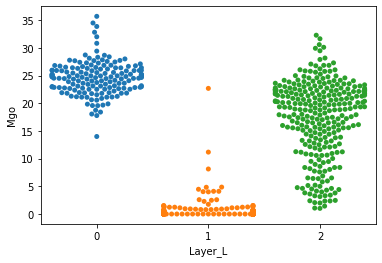

In [15]:
sns.swarmplot(data=geoassay,x='Layer_L',y='Mgo')

Since iron (Fe) was important value minerals, so we want to see the correlation between Ni, Fe and Layer

In [16]:
sns.displot(data=geoassay,x='Fe',y='Ni',row='Layer_L',kind='hist',legend=True)

AttributeError: module 'seaborn' has no attribute 'displot'

In [17]:
np.unique(geoassay['Layer_L'])

array([0, 1, 2])

In [18]:
geoassay.corr(method='pearson')

,Hole ID,Depth,Ni,Fe,Sio2,Mgo,Layer_L
Hole ID,1.000000,-0.016192,0.075545,0.026118,0.008789,-0.047192,0.108060
Depth,-0.016192,1.000000,0.158164,-0.704762,0.699457,0.715033,0.025430
Ni,0.075545,0.158164,1.000000,-0.111948,0.207678,0.035105,0.772217
Fe,0.026118,-0.704762,-0.111948,1.000000,-0.981212,-0.967050,-0.032762
Sio2,0.008789,0.699457,0.207678,-0.981212,1.000000,0.948439,0.132052
Mgo,-0.047192,0.715033,0.035105,-0.967050,0.948439,1.000000,-0.042258
Layer_L,0.108060,0.025430,0.772217,-0.032762,0.132052,-0.042258,1.000000


# Modeling with Logistic Regression

Logistic Regression is a variation of Linear Regression, useful when the observed dependent variable, y, is categorical. It produces a formula that predicts the probability of the class label as a function of the independent variables.

Set x the independent variables which contains features like Ni, Fe, Sio2, Depth, Hole ID, and Mgo as arrays. 

In [19]:
x=np.array(geoassay[['Ni','Fe','Sio2','Mgo','Hole ID','Depth']])
x

array([[ 0.62, 48.05,  2.87,  0.51,  0.  ,  1.  ],
       [ 0.73, 49.93,  1.85,  0.49,  0.  ,  2.  ],
       [ 0.77, 47.7 ,  2.25,  0.63,  0.  ,  3.  ],
       ...,
       [ 0.24,  7.75, 36.36, 24.7 , 47.  ,  5.  ],
       [ 0.22,  8.01, 38.5 , 24.79, 47.  ,  6.  ],
       [ 0.21,  7.66, 40.64, 25.02, 47.  ,  6.55]])

set y the independent variables which contains feature Layer as array too.

In [20]:
y=np.array(geoassay['Layer_L'])
y

array([1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 0, 0, 1, 1, 1, 1, 2, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,

we will normalize the value of x so it will have a better range of value

In [21]:
x = StandardScaler().fit(x).transform(x)
x

array([[-0.68829105,  1.09662479, -1.00500673, -0.94898322, -1.70867271,
        -1.43840895],
       [-0.52822296,  1.20145717, -1.06703408, -0.95080821, -1.70867271,
        -1.27432518],
       [-0.47001638,  1.07710813, -1.04270963, -0.93803327, -1.70867271,
        -1.1102414 ],
       ...,
       [-1.24125355, -1.15057993,  1.03155802,  1.25834314,  1.73255372,
        -0.78207385],
       [-1.27035684, -1.13608184,  1.16169383,  1.2665556 ,  1.73255372,
        -0.61799008],
       [-1.28490849, -1.1555985 ,  1.29182965,  1.28754299,  1.73255372,
        -0.527744  ]])

Now, we will split the data into train data and test data, which test data have proportion 20% of the data. 

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=2)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (669, 6) (669,)
Test set: (168, 6) (168,)


C parameter indicates inverse of regularization strength which must be a positive float. Smaller values specify stronger regularization.

we use Limited-memory Broyden–Fletcher–Goldfarb–Shanno or lbfgs solver because our data set is small.

In [23]:
LR = LogisticRegression(C=0.01,solver='lbfgs').fit(x_train, y_train)

In [24]:
yhat = LR.predict(x_test)
yhat

array([1, 2, 0, 2, 1, 1, 2, 1, 1, 1, 0, 1, 1, 0, 1, 2, 1, 1, 0, 2, 2, 1,
       2, 1, 0, 1, 0, 1, 2, 2, 2, 0, 2, 1, 2, 0, 2, 2, 1, 1, 1, 1, 2, 1,
       2, 1, 0, 2, 2, 1, 1, 0, 1, 2, 0, 1, 1, 0, 1, 2, 2, 1, 1, 1, 2, 2,
       0, 2, 0, 2, 1, 1, 1, 2, 0, 2, 1, 0, 0, 1, 2, 2, 0, 2, 2, 0, 1, 2,
       0, 2, 0, 1, 0, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2,
       0, 1, 2, 1, 1, 1, 2, 2, 0, 0, 0, 2, 0, 2, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 2, 1, 2, 1, 0, 2, 1, 1, 2, 2, 1, 1, 1, 1, 0, 1, 2,
       1, 2, 1, 1, 2, 1, 1, 0, 2, 0, 2, 2, 2, 2])

#Classification Report

In [34]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93        32
           1       0.96      0.99      0.97        73
           2       0.97      0.89      0.93        63

    accuracy                           0.95       168
   macro avg       0.94      0.95      0.94       168
weighted avg       0.95      0.95      0.95       168



Based on the count of each section, we can calculate precision and recall of each label:


- __Precision__ is a measure of the accuracy provided that a class label has been predicted. It is defined by: precision = TP / (TP + FP)

- __Recall__ is true positive rate. It is defined as: Recall =  TP / (TP + FN)

    
So, we can calculate precision and recall of each class.

__F1 score:__
Now we are in the position to calculate the F1 scores for each label based on the precision and recall of that label. 

The F1score is the harmonic average of the precision and recall, where an F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0. It is a good way to show that a classifer has a good value for both recall and precision.


And finally, we can tell the average accuracy for this classifier is the average of the f1-score for both labels, which is 0.95 in our case.

#Evaluation 

##Jaccard Score

so we have made the prediction model of yhat. now we want to evaluate the similarity between y_test and yhat using jaccard similarity score. if the score closer to 1 than our model is good, otherwise it's not good.

In [33]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import jaccard_score
jaccard_similarity_score(y_test, yhat)

ImportError: cannot import name 'jaccard_similarity_score' from 'sklearn.metrics' (/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/sklearn/metrics/__init__.py)

##Confusion Matrix

for double evaluation we will make confusion matrix. confusion matrix will compare the true value and predicted value of each Layer. 

In [27]:
classes=[0,1,2]

In [28]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
confusion_matrix(y_test,yhat,labels=classes)

array([[31,  0,  1],
       [ 0, 72,  1],
       [ 4,  3, 56]])

now we will visualize the confusion matrix.

In [29]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

Confusion matrix, without normalization
[[31  0  1]
 [ 0 72  1]
 [ 4  3 56]]


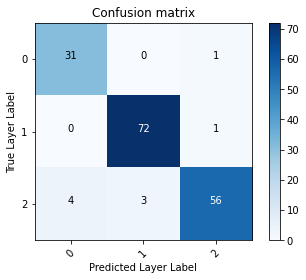

In [30]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=classes)
plt.ylabel('True Layer Label')
plt.xlabel('Predicted Layer Label')
plot_confusion_matrix(cnf_matrix,classes=classes,normalize= False, title='Confusion matrix')

##Log Loss

Now, lets try log loss for evaluation. In logistic regression, It uses a loss function called log loss to calculate the error. so the lesser log loss value the lesser error we have.

In [31]:
yhat_prob = LR.predict_proba(x_test)
yhat_prob

array([[0.03325691, 0.8449353 , 0.12180779],
       [0.07755775, 0.30991177, 0.61253049],
       [0.5900121 , 0.03756144, 0.37242646],
       [0.07185852, 0.05584123, 0.87230025],
       [0.02327552, 0.6518071 , 0.32491738],
       [0.03015138, 0.87167025, 0.09817837],
       [0.02672334, 0.03414795, 0.93912871],
       [0.03933748, 0.90403622, 0.0566263 ],
       [0.03147701, 0.90842302, 0.06009996],
       [0.03371335, 0.88198134, 0.0843053 ],
       [0.69635843, 0.03880177, 0.26483979],
       [0.0539556 , 0.78196883, 0.16407557],
       [0.02510246, 0.94670125, 0.02819629],
       [0.69205404, 0.04688775, 0.26105821],
       [0.01884258, 0.93552999, 0.04562743],
       [0.10888694, 0.33356785, 0.55754521],
       [0.02874672, 0.91109817, 0.06015512],
       [0.1363656 , 0.73109866, 0.13253574],
       [0.65517903, 0.06098405, 0.28383692],
       [0.09354144, 0.33168265, 0.57477591],
       [0.10224598, 0.0251338 , 0.87262023],
       [0.04493089, 0.8513849 , 0.10368421],
       [0.

In [32]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.2864566727639143